In [102]:
#Import required lib
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns

In [63]:
#Importing the data set into dataframe 
df= pd.read_excel("./Unicorn_Companies.xlsx")

In [37]:
#Loading the first 5 rows of the table
df.head(5)

,Unicorn_Companies,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1,Bytedance,$180B,07-04-2017,Artificial intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S..."
2,SpaceX,$100B,01-12-2012,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
3,SHEIN,$100B,03-07-2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2,"Tiger Global Management, Sequoia Capital China..."
4,Stripe,$95B,23-01-2014,Fintech,San Francisco,United States,North America,2010,2,"Khosla Ventures, LowercaseCapital, capitalG"


### Data Prepration

In [68]:
#Reanming the column names 
df.rename(columns ={'Unicorn_Companies' : 'Comapny', 'Unnamed: 1' : 'Valuation', 'Unnamed: 2' : 'Date of Joining'},inplace = True)

In [69]:
df.rename(columns ={'Unnamed: 3' : 'Industry', 'Unnamed: 4' : 'City', 
                    'Unnamed: 5' : 'Country','Unnamed: 6' : 'Continent',
                    'Unnamed: 7' : 'Year founded','Unnamed: 8' : 'Funding','Unnamed: 9' : 'Investors'},inplace = True)

In [9]:
df

,Comapny,Valuation,Date of Joining,Industry,City,Country,Continent,Year founded,Funding,Investors
0,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1,Bytedance,$180B,07-04-2017,Artificial intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S..."
2,SpaceX,$100B,01-12-2012,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
3,SHEIN,$100B,03-07-2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2,"Tiger Global Management, Sequoia Capital China..."
4,Stripe,$95B,23-01-2014,Fintech,San Francisco,United States,North America,2010,2,"Khosla Ventures, LowercaseCapital, capitalG"
...,...,...,...,...,...,...,...,...,...,...
1070,Zhaogang,$1B,29-06-2017,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,0.379,"K2 Ventures, Matrix Partners China, IDG Capital"
1071,Zhuan Zhuan,$1B,18-04-2017,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,0.99,"58.com, Tencent Holdings"
1072,Zihaiguo,$1B,06-05-2021,Consumer & retail,Chongqing,China,Asia,2018,0.08,"Xingwang Investment Management, China Capital ..."
1073,Zopa,$1B,19-10-2021,Fintech,London,United Kingdom,Europe,2005,0.792,"IAG Capital Partners, Augmentum Fintech, North..."


In [10]:
df.drop(index=df.index[0], axis=0, inplace=True)
df.head(10)

,Comapny,Valuation,Date of Joining,Industry,City,Country,Continent,Year founded,Funding,Investors
1,Bytedance,$180B,07-04-2017,Artificial intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S..."
2,SpaceX,$100B,01-12-2012,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
3,SHEIN,$100B,03-07-2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2,"Tiger Global Management, Sequoia Capital China..."
4,Stripe,$95B,23-01-2014,Fintech,San Francisco,United States,North America,2010,2,"Khosla Ventures, LowercaseCapital, capitalG"
5,Klarna,$46B,12-12-2011,Fintech,Stockholm,Sweden,Europe,2005,4,"Institutional Venture Partners, Sequoia Capita..."
6,Canva,$40B,08-01-2018,Internet software & services,Surry Hills,Australia,Oceania,2012,0.572,"Sequoia Capital China, Blackbird Ventures, Mat..."
7,Checkout.com,$40B,02-05-2019,Fintech,London,United Kingdom,Europe,2012,2,"Tiger Global Management, Insight Partners, DST..."
8,Instacart,$39B,30-12-2014,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,3,"Khosla Ventures, Kleiner Perkins Caufield & By..."
9,JUUL Labs,$38B,20-12-2017,Consumer & retail,San Francisco,United States,North America,2015,14,Tiger Global Management
10,Databricks,$38B,05-02-2019,Data management & analytics,San Francisco,United States,North America,2013,3,"Andreessen Horowitz, New Enterprise Associates..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 1 to 1074
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Comapny          1074 non-null   object
 1   Valuation        1074 non-null   object
 2   Date of Joining  1074 non-null   object
 3   Industry         1074 non-null   object
 4   City             1058 non-null   object
 5   Country          1074 non-null   object
 6   Continent        1074 non-null   object
 7   Year founded     1074 non-null   object
 8   Funding          1074 non-null   object
 9   Investors        1073 non-null   object
dtypes: object(10)
memory usage: 84.0+ KB


In [12]:
df.columns

Index(['Comapny', 'Valuation', 'Date of Joining', 'Industry', 'City',
       'Country', 'Continent', 'Year founded', 'Funding', 'Investors'],
      dtype='object')

In [13]:
df.shape

(1074, 10)

In [14]:
# Checking for duplicate values 
df.drop_duplicates(inplace= True)
df.shape

(1074, 10)

In [7]:
#Checking for null values
df.isna().sum()

Comapny             0
Valuation           0
Date of Joining     0
Industry            0
City               16
Country             0
Continent           0
Year founded        0
Funding             0
Investors           1
dtype: int64

### Drop all Null values


In [8]:
df.dropna(inplace=True)

In [9]:
df.head(5)

,Comapny,Valuation,Date of Joining,Industry,City,Country,Continent,Year founded,Funding,Investors
0,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1,Bytedance,$180B,07-04-2017,Artificial intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S..."
2,SpaceX,$100B,01-12-2012,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
3,SHEIN,$100B,03-07-2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2,"Tiger Global Management, Sequoia Capital China..."
4,Stripe,$95B,23-01-2014,Fintech,San Francisco,United States,North America,2010,2,"Khosla Ventures, LowercaseCapital, capitalG"


### Country-wise company check

In [10]:
#lets talk about INDIA
India =df[df['Country']== "India"]
India

,Comapny,Valuation,Date of Joining,Industry,City,Country,Continent,Year founded,Funding,Investors
16,BYJU's,$22B,25-07-2017,Edtech,Bengaluru,India,Asia,2008,4,"Tencent Holdings, Lightspeed India Partners, S..."
42,Swiggy,$11B,21-06-2018,"Supply chain, logistics, & delivery",Bengaluru,India,Asia,2014,5,"Accel India, SAIF Partners, Norwest Venture Pa..."
49,OYO Rooms,$10B,25-09-2018,Travel,Gurugram,India,Asia,2012,3,"SoftBank Group, Sequoia Capital India,Lightspe..."
72,Dream11,$8B,09-04-2019,Internet software & services,Mumbai,India,Asia,2007,2,"Kaalari Capital, Tencent Holdings, Steadview C..."
75,Razorpay,$8B,11-10-2020,Fintech,Bengaluru,India,Asia,2013,0.742,"Sequoia Capital India, Tiger Global Management..."
...,...,...,...,...,...,...,...,...,...,...
956,Licious,$1B,05-10-2021,E-commerce & direct-to-consumer,Bengaluru,India,Asia,2015,0.489,"3one4 Capital Partners, Bertelsmann India Inve..."
968,Mensa Brands,$1B,16-11-2021,Other,Bengaluru,India,Asia,2021,0.218,"Accel, Falcon Edge Capital, Norwest Venture Pa..."
982,NoBroker,$1B,23-11-2021,Internet software & services,Bengaluru,India,Asia,2014,0.424,"General Atlantic, Elevation Capital, BEENEXT"
1027,Slice,$1B,28-11-2021,Fintech,Bengaluru,India,Asia,2015,0.249,"Gunosy Capital, Blume Ventures, Das Capital"


In [15]:
#based on valuation
company_wise_val = df.sort_values(by= "Valuation", ascending= False)

In [16]:
company_wise_val.head(10)

,Comapny,Valuation,Date of Joining,Industry,City,Country,Continent,Year founded,Funding,Investors
68,N26,$9B,10-01-2019,Fintech,Berlin,Germany,Europe,2013,2,"Redalpine Venture Partners, Earlybird Venture ..."
62,Dunamu,$9B,22-07-2021,Fintech,Seoul,South Korea,Asia,2012,0.071,"Qualcomm Ventures, Woori Investment, Hanwha In..."
63,Yanolja,$9B,10-06-2019,Travel,Seoul,South Korea,Asia,2005,2,"SBI Investment Korea, Partners Investment, GIC"
64,Pony.ai,$9B,11-07-2018,Artificial intelligence,Fremont,United States,North America,2016,1,"Sequoia Capital China, IDG Capital, DCM Ventures"
65,Nuro,$9B,11-02-2019,Auto & transportation,Mountain View,United States,North America,2016,2,"SoftBank Group, Greylock Partners, Gaorong Cap..."
66,Snyk,$9B,21-01-2020,Cybersecurity,Boston,United States,North America,2015,1,"BOLDstart Ventures, Google Ventures, Accel"
67,Kavak,$9B,01-10-2020,E-commerce & direct-to-consumer,Lerma de Villada,Mexico,North America,2016,2,"DST Global, SoftBank Group, Mountain Nazca"
69,Klaviyo,$9B,17-11-2020,Internet software & services,Boston,United States,North America,2012,0.679,"Summit Partners, Accel, Astral Capital"
70,Niantic,$9B,24-11-2017,Mobile & telecommunications,San Francisco,United States,North America,2015,0.77,"Nintendo, Google, Pokemon Company Internationa..."
71,Tanium,$9B,31-03-2015,Cybersecurity,Kirkland,United States,North America,2007,0.775,"Andreessen Horowitz, Nor-Cal Invest, TPG Growth"


In [17]:
df[df['Comapny']== "Canva"]

,Comapny,Valuation,Date of Joining,Industry,City,Country,Continent,Year founded,Funding,Investors
6,Canva,$40B,08-01-2018,Internet software & services,Surry Hills,Australia,Oceania,2012,0.572,"Sequoia Capital China, Blackbird Ventures, Mat..."


### no of unicorn company in a city

In [18]:
df.City.value_counts().head(10)

San Francisco    152
New York         103
Beijing           63
Shanghai          44
London            34
Bengaluru         29
Shenzhen          19
Paris             19
Palo Alto         18
Berlin            17
Name: City, dtype: int64

### Country based unicorn companies 

In [19]:
df[df.Country== "India"][['Comapny','Valuation','Industry','Year founded',]].head(20)

,Comapny,Valuation,Industry,Year founded
16,BYJU's,$22B,Edtech,2008
42,Swiggy,$11B,"Supply chain, logistics, & delivery",2014
49,OYO Rooms,$10B,Travel,2012
72,Dream11,$8B,Internet software & services,2007
75,Razorpay,$8B,Fintech,2013
85,National Stock Exchange of India,$7B,Fintech,1998
88,CRED,$7B,Fintech,2018
90,Ola Cabs,$7B,Auto & transportation,2010
129,DailyHunt,$5B,Internet software & services,2007
131,Meesho,$5B,Internet software & services,2015


### Fintech industry based in india

In [20]:

df[df.Country== 'India'][df[df.Country=='India'].Industry=='Fintech']['Comapny']

75                              Razorpay
85      National Stock Exchange of India
88                                  CRED
163                            Pine Labs
245                               Upstox
261                      Digit Insurance
313                             BharatPe
340                                Groww
373                         PolicyBazaar
523                     CoinSwitch Kuber
610                           CredAvenue
631                             MobiKwik
809               Acko General Insurance
814                              CoinDCX
1027                               Slice
Name: Comapny, dtype: object

### Most Value unicorn based country

In [105]:
df.columns

Index(['Comapny', 'Valuation', 'Date of Joining', 'Industry', 'City',
       'Country', 'Continent', 'Year founded', 'Funding', 'Investors'],
      dtype='object')

In [111]:
y=df.groupby('Country').sum().sort_values(by='Valuation',ascending=True ).head(10)

px.bar(df,x='Country',y='Valuation')

### Unicorn compnies in diffrent industry sector

In [94]:
fig = px.pie(df, names='Industry')
fig.show()

## year wise company joined the unicorn club

In [95]:
fig2=px.line(df,x='Comapny',y='Year founded',title='Year-wise company joined ')
fig2.show()

## Country based start up valuation

In [25]:
valuation_Country =px.bar(df,x='Country',y='Valuation')
valuation_Country.show()

## 10 companies have the most unicorn companies

Text(0.5, 1.0, '10 Countries having the most unicorn companies')

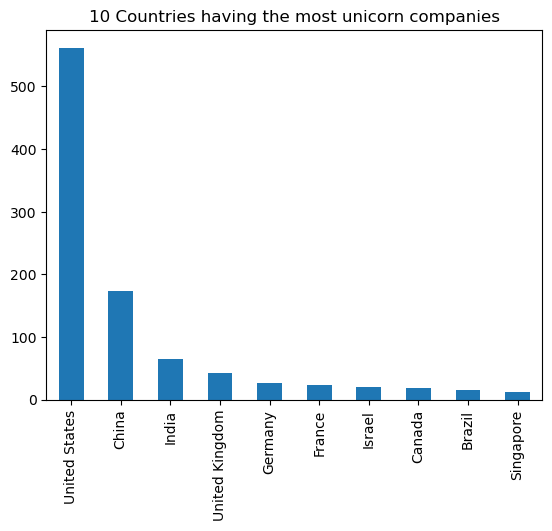

In [29]:
df['Country'].value_counts()[:10].plot(kind='bar')
plt.title("10 Countries having the most unicorn companies")

## Continent-wise distribution

In [31]:
values =df['Continent'].value_counts().values
index=df['Continent'].value_counts().index


In [34]:
fig = px.pie(df,values=values,names=index ,title="Continent-Wise distribution")

fig.show()

## Industries-wise distribution of unicorn Comapnies in INDIA

In [70]:
df.columns

Index(['Comapny', 'Valuation', 'Date of Joining', 'Industry', 'City',
       'Country', 'Continent', 'Year founded', 'Funding', 'Investors'],
      dtype='object')

Text(0.5, 1.0, 'Industy wise distribution of unicorn companies in INDIA')

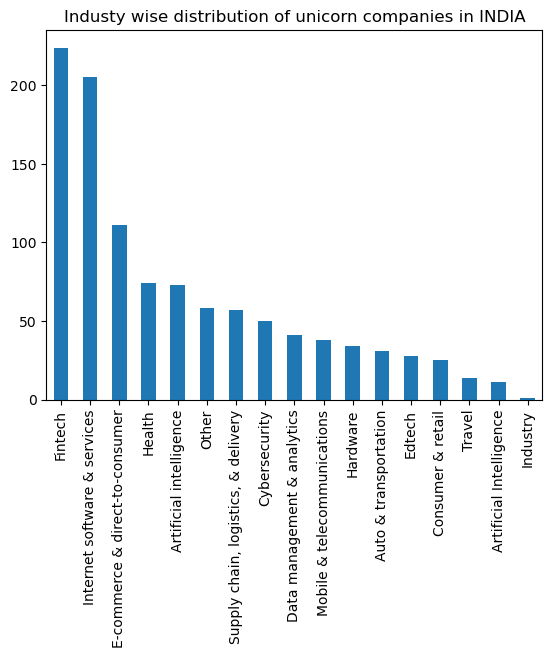

In [57]:
df['Industry'].value_counts().plot(kind='bar')
plt.title("Industy wise distribution of unicorn companies in INDIA")